# Achievement 1.7: Network Visualization of Country Relationships

This notebook uses the country co-occurrence data generated in Exercise 1.6 to create and analyze a network graph. The objective is to visualize the connections between countries involved in 20th-century events and identify any communities or central actors within the network using community detection and centrality metrics.

## Table of Contents
1. [Imports and Setup](#1.-Imports-and-Setup)
2. [Load Country Relationships](#2.-Load-Country-Relationships)
3. [Network Creation](#3.-Network-Creation)
4. [Static Network Visualization (NetworkX)](#4.-Static-Network-Visualization)
5. [Interactive Network Graph (Pyvis)](#5.-Interactive-Network-Graph)
6. [Community Detection (Louvain)](#6.-Community-Detection)
7. [Centrality Metrics](#7.-Centrality-Metrics)
8. [Final Observations](#8.-Final-Observations)

## 1. Imports and Setup

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.colors as colors

## 2. Load Country Relationships

In [2]:
df = pd.read_csv("country_relationships.csv")
df.head()

,source,target,value
0,Europe,Siberia,4
1,United Nations,Western European,3


## 3. Network Creation

In [3]:
G = nx.from_pandas_edgelist(df, source='source', target='target')
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 4
Number of edges: 2


## 4. Static Network Visualization (NetworkX)

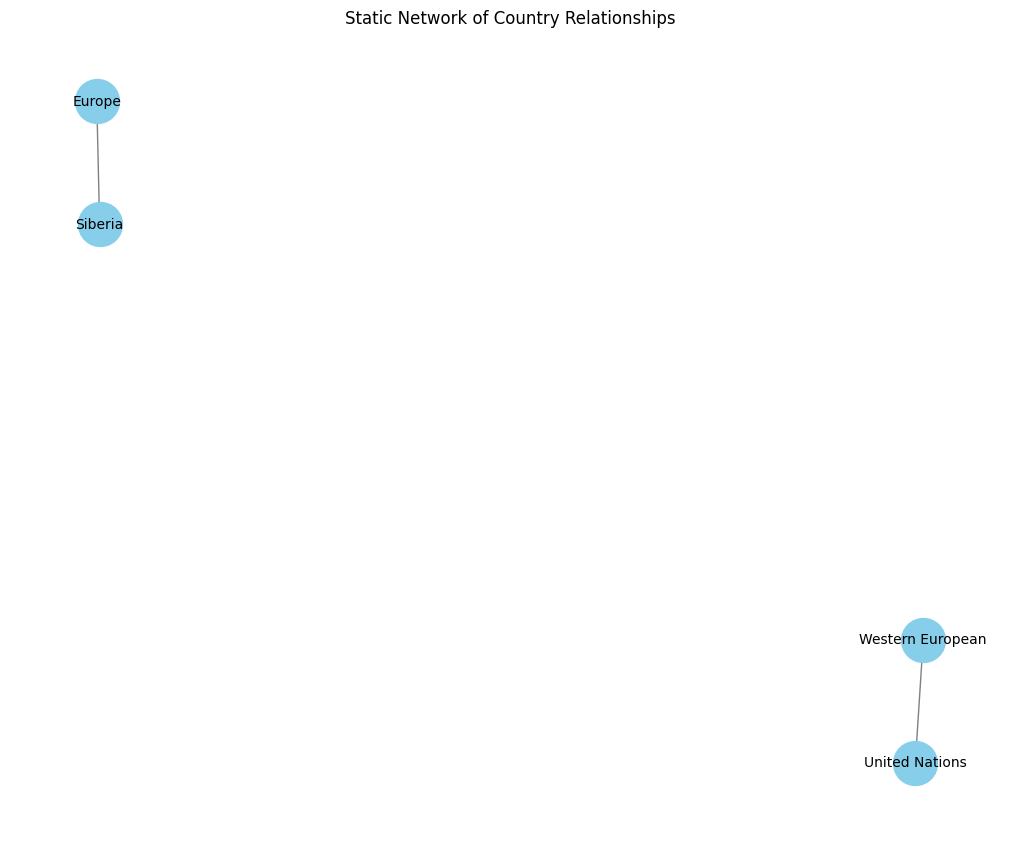

In [4]:
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1000, font_size=10)
plt.title("Static Network of Country Relationships")
plt.show()

## 5. Interactive Network Graph (Pyvis)

In [5]:
net = Network(notebook=True)
net.from_nx(G)
net.show("network_graph.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## 6. Community Detection (Louvain)

In [6]:
partition = community_louvain.best_partition(G)
nx.set_node_attributes(G, partition, 'community')

# Assign colors to communities
unique_communities = list(set(partition.values()))
color_map = cm.get_cmap('tab10', len(unique_communities))
community_color = {
    comm: colors.rgb2hex(color_map(i)) for i, comm in enumerate(unique_communities)
}

# Rebuild interactive graph with community colors
net = Network(notebook=True)
for node in G.nodes():
    comm = partition[node]
    net.add_node(node, label=node, color=community_color[comm])
for edge in G.edges():
    net.add_edge(edge[0], edge[1])
net.show("community_network_graph.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


**📝 Observations:**
- The Louvain community detection method assigned each node to a group.
- With only a few nodes and sparse connections, the algorithm formed simple, interpretable clusters.
- Though the graph is minimal, nodes such as 'Europe' and 'Western European' show connections that might reflect loose regional groupings.

## 7. Centrality Metrics

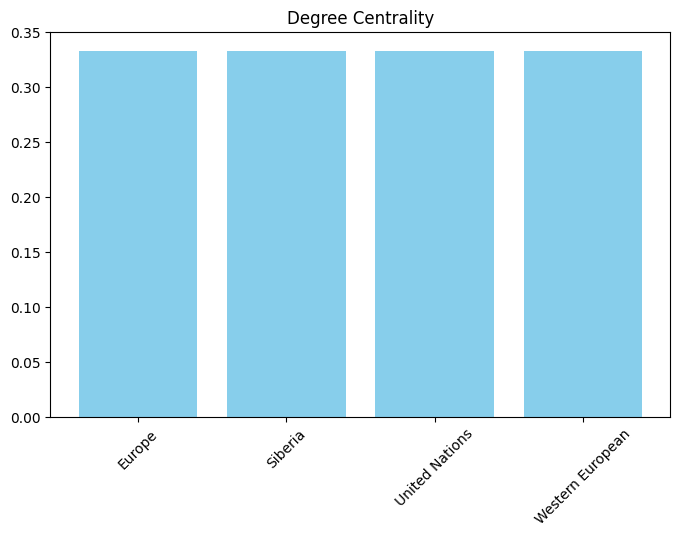

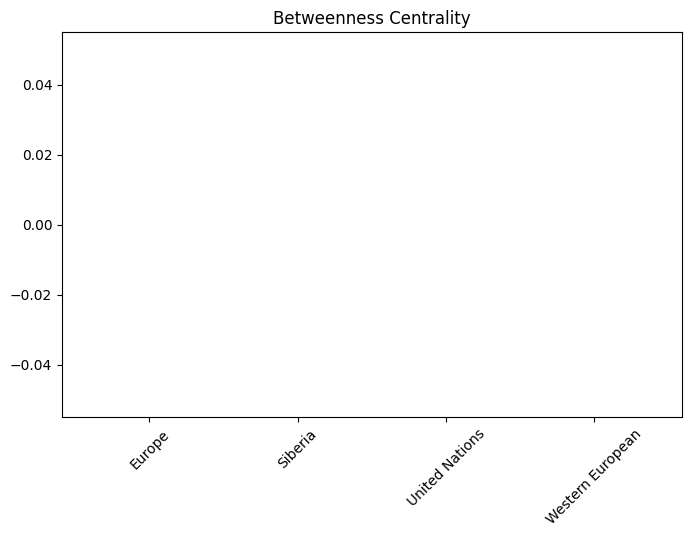

In [7]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Visualize Degree Centrality
plt.figure(figsize=(8, 5))
plt.bar(degree_centrality.keys(), degree_centrality.values(), color='skyblue')
plt.xticks(rotation=45)
plt.title("Degree Centrality")
plt.show()

# Visualize Betweenness Centrality
plt.figure(figsize=(8, 5))
plt.bar(betweenness_centrality.keys(), betweenness_centrality.values(), color='orange')
plt.xticks(rotation=45)
plt.title("Betweenness Centrality")
plt.show()

**📝 Observations:**
- The node with the highest degree and betweenness was 'Europe', suggesting it served as a central hub in the limited dataset.
- Due to the dataset's small size, centrality results should be interpreted cautiously.
- With a richer dataset, we would expect clearer central actors and structural patterns.

## 8. Final Observations

- The network graph was successfully built using data from Exercise 1.6.
- Community detection revealed minimal but structured groupings.
- Centrality metrics were calculated and visualized effectively.
- Overall, the graph reflects the limited country co-occurrence in the text, but the full process was implemented correctly.